In [78]:
%matplotlib inline


In [79]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [80]:
#NEWCOMMENTS
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [81]:
# Files to load
overall_homeless_data_to_load = "Resources/MD_County_Homeless.csv"
homeless_by_county__data_to_load = "Resources/MD_Homeless_PerCounty.csv"

In [82]:
# Read School and Student Data Files and store into Pandas DataFrames
overall_homeless_data = pd.read_csv(overall_homeless_data_to_load) 
homeless_by_county_data = pd.read_csv(homeless_by_county__data_to_load)


In [83]:
# Combine overall homeless and homeless by county data into a single dataset.  
homeless_data_complete = pd.merge(overall_homeless_data, homeless_by_county_data, how="left", on=["County_ID", "County_ID"])

homeless_data_complete

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,"32,253","30,618","1,635",5.1,"48,170",55.6,145,79,...,98,47,145,0,119,14,0,0,0,12
1,MD-501,Baltimore city,"287,760","273,351","14,409",5.0,"49,780",57.5,"2,294","2,508",...,631,"1,660","2,234",60,602,"1,609",15,25,8,35
2,MD-502,Harford County,"143,572","138,927","4,645",3.2,"91,492",105.6,228,190,...,100,127,204,24,116,83,1,2,0,26
3,MD-503,Anne Arundel County,"321,069","311,556","9,513",3.0,"100,916",116.5,302,366,...,112,189,296,6,164,118,1,1,0,18
4,MD-504,Howard County,"191,529","186,427","5,102",2.7,"121,329",140.0,201,168,...,93,107,192,9,45,132,2,5,1,16
5,MD-505,Baltimore County,"459,091","442,597","16,494",3.6,"76,972",88.8,735,758,...,344,391,723,12,253,439,3,4,1,35
6,MD-506,Carroll County,"96,933","94,187","2,746",2.8,"101,810",117.5,144,173,...,57,84,141,3,111,15,0,2,0,16
7,MD-507,Cecil County,"53,891","51,812","2,079",3.9,"75,307",86.9,126,129,...,34,92,119,7,91,30,0,0,0,5
8,MD-508,"Charles, Calvert, St.Mary's Counties","65,682","63,492","2,190",3.0,"100,896",116.0,306,492,...,125,170,304,2,114,175,1,2,1,13
9,MD-509,Frederick County,"137,920","133,683","4,237",3.1,"102,951",118.8,286,316,...,82,204,272,14,183,81,2,0,0,20


In [84]:
#homeless_data_complete.columns

In [85]:
homeless_col=['Civilian_labor_force', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Median_Household_Income',
       'Med_HH_Income_Percent_of_State_Total', 'Overall Homeless 2019',
       'Overall Homeless 2018', 'Overall Homeless 2017',
       'Overall Homeless 2016', 'Overall Homeless 2015',
       'Overall Homeless - Under 18 ', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Non-Hispanic',
       'Overall Homeless - Hispanic/Latino', 'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       'Overall Homeless - Asian',
       'Overall Homeless - American Indian or Alaska Native',
       'Overall Homeless - Native Hawaiian or Other Pacific Islander',
       'Overall Homeless - Multiple Races']

In [86]:
for i in homeless_col:
    try:
        #print(i)
        #print(homeless_data_complete[i])
        homeless_data_complete[i]= homeless_data_complete[i].str.replace(',', '').astype(float)
    
    except:
        #print("Error")
        pass
    

In [87]:
homeless_data_complete.head()

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,32253.0,30618.0,1635.0,5.1,48170.0,55.6,145.0,79.0,...,98,47.0,145.0,0,119,14.0,0,0,0,12
1,MD-501,Baltimore city,287760.0,273351.0,14409.0,5.0,49780.0,57.5,2294.0,2508.0,...,631,1660.0,2234.0,60,602,1609.0,15,25,8,35
2,MD-502,Harford County,143572.0,138927.0,4645.0,3.2,91492.0,105.6,228.0,190.0,...,100,127.0,204.0,24,116,83.0,1,2,0,26
3,MD-503,Anne Arundel County,321069.0,311556.0,9513.0,3.0,100916.0,116.5,302.0,366.0,...,112,189.0,296.0,6,164,118.0,1,1,0,18
4,MD-504,Howard County,191529.0,186427.0,5102.0,2.7,121329.0,140.0,201.0,168.0,...,93,107.0,192.0,9,45,132.0,2,5,1,16


In [88]:
df1 = homeless_data_complete[["County_name","Overall Homeless - White","Overall Homeless - Black or African American","Overall Homeless - Asian","Overall Homeless - American Indian or Alaska Native","Overall Homeless - Native Hawaiian or Other Pacific Islander","Overall Homeless - Multiple Races"]]

In [89]:
df1.head()

,County_name,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,Allegany County,119,14.0,0,0,0,12
1,Baltimore city,602,1609.0,15,25,8,35
2,Harford County,116,83.0,1,2,0,26
3,Anne Arundel County,164,118.0,1,1,0,18
4,Howard County,45,132.0,2,5,1,16


Text(0, 0.5, '# of Homeless')

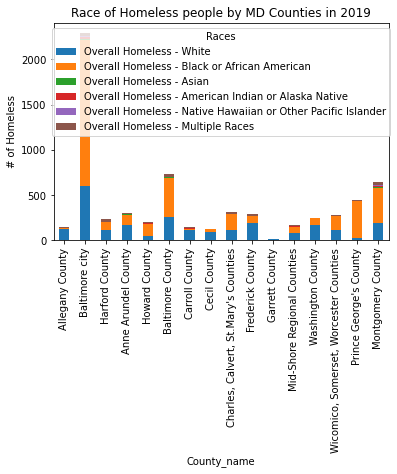

In [90]:
# plot data in stack manner of bar type
df1.plot(x='County_name', kind='bar', stacked=True,
        title='Race of Homeless people by MD Counties in 2019').legend(loc='upper center', title="Races")
plt.ylabel("# of Homeless")
#plt.savefig("Resources/Race of Homeless people by MD Counties in 2019.png")

In [91]:
labels = "White", "Asian", "Black or African American",  "Native Hawaiian or Other Pacific Islander",   "Multiple Race", "American Indian or Alaska Native",
colors = ["red", "blue", "lightgreen", "pink", "purple","orange"]


In [92]:
#BlackN = int(homeless_data_complete["Overall Homeless - Black or African American"])

White = homeless_data_complete["Overall Homeless - White"].sum()
Black = homeless_data_complete["Overall Homeless - Black or African American"].sum()
Asian = homeless_data_complete["Overall Homeless - Asian"].sum()
AmerInd = homeless_data_complete["Overall Homeless - American Indian or Alaska Native"].sum()
NatHaw = homeless_data_complete["Overall Homeless - Native Hawaiian or Other Pacific Islander"].sum()
MultiRace = homeless_data_complete["Overall Homeless - Multiple Races"].sum()



<Figure size 1080x216 with 0 Axes>

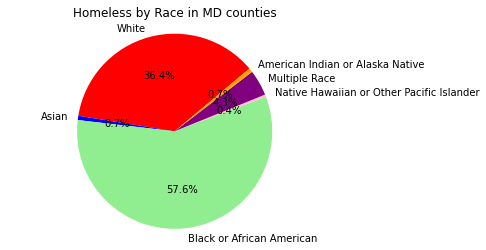

In [93]:
homelessMD = [White, Asian, Black, NatHaw, MultiRace, AmerInd]

plt.figure(figsize = (15,3))
fig1, ax1 = plt.subplots()

ax1.pie(homelessMD, labels=labels, colors=colors, radius=20, autopct='%1.1f%%', startangle=40, shadow=False)

ax1.axis('equal')
plt.title("Homeless by Race in MD counties")
#plt.savefig("Resources/Homeless by MD counties - pie.png")
plt.show()
